## Guided Project: Visulaizing the Gender Gap in College Degrees ##

we'll extend the work we did earlier on visualizing the gender gap across college degrees by generating line charts to compare across all degree categories. In the last step of this guided project, we'll explore exporting the final diagram we create as an image file.

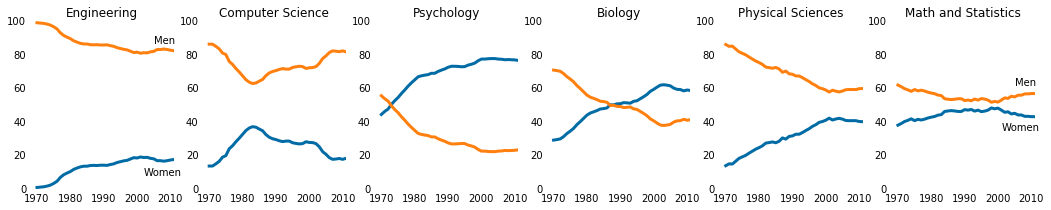

In [1]:
# Code written so far in exploring the previous missions.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

In [2]:
women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

In [3]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

There are seventeen degrees that we need to generate line charts for. We'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and others:

In [4]:
women_degrees.describe()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1990.500000,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.267844,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,1970.000000,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,1980.250000,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,1990.500000,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,2000.750000,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,2011.000000,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


Making 3 lists to store all the degrees in three different categories: STEM, Liberal Arts, Others.
These lists are ordered in descending order by the percentage of degrees awarded to women i.e. sorted descending by Mean. 


In [5]:
# Categories vs. lists explained: 
#STEM = stem_cats, Liberal Arts = lib_arts_cats, Others = other_cats
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

#### To display the 17 degrees in a visually comparable way, we will use a 6 by 3 plot and divide the categories to be displayed column wise. ####

The functions take care of below concepts:

1. Chart Junk elimination by spines, tick_params set to off
2. Setting x_lim and y_lim to the correct limits
3. Text Annotations to display the leader in category
4. Setting yticks to simplify the overall plotting display
5. x Axis labels are set to display for only the last subplots to simplify readability
6. Addinga horizontal line at position 50 to indicate midway breakdown.

In [64]:
#Defining functions to plot the above 3 categories in 3 columns of a 6 by 3 subplot
def firstcolumn_stem_plot():
    for sp in range(0,18,3):
        cat_index = int(sp/3)
        ax = fig.add_subplot(6,3,sp+1)
        ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
        # Set spines to be invisible
        for key,spine in ax.spines.items():
            spine.set_visible(False)
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = "off")
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.axhline(50, c=(127/255, 127/255, 127/255), alpha=0.3)
        ax.set_title(stem_cats[cat_index])
        # Text Annotations for Women and Men in the topmost and bottommost plots
        if cat_index == 0:
            ax.text(2005, 82, 'Men')
            ax.text(2003, 13, 'Women')
        elif cat_index == 5:
            ax.text(2005, 87, 'Men')
            ax.text(2003, 8, 'Women')
            ax.tick_params(labelbottom = "on")
def secondcolumn_lib_arts_plot():
    for sp in range(0,15,3):
        cat_index = int(sp/3)
        ax = fig.add_subplot(6,3,sp+2)
        ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
        # Set spines to be invisible
        for key,spine in ax.spines.items():
            spine.set_visible(False)
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = "off")
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.axhline(50, c=(127/255, 127/255, 127/255), alpha=0.3)
        ax.set_title(lib_arts_cats[cat_index])
        # Text Annotations for Women and Men in the topmost and bottommost plots
        if cat_index == 0:
            ax.text(2005, 75, 'Men')
            ax.text(2002, 25, 'Women')
        elif cat_index == 4:
            ax.tick_params(labelbottom = "on")
def thirdcolumn_others_plot():
    for sp in range(0,18,3):
        cat_index = int(sp/3)
        ax = fig.add_subplot(6,3,sp+3)
        ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.axhline(50, c=(127/255, 127/255, 127/255), alpha=0.3)
        ax.set_title(other_cats[cat_index])
        # Set spines to be invisible
        for key,spine in ax.spines.items():
            spine.set_visible(False)
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        # Text Annotations for Women and Men in the topmost and bottommost plots
        if cat_index == 0:
            ax.text(2005, 90, 'Men')
            ax.text(2005, 8, 'Women')
        elif cat_index == 5:
            ax.text(2005, 60, 'Men')
            ax.text(2003, 30, 'Women')
            ax.tick_params(labelbottom = "on")

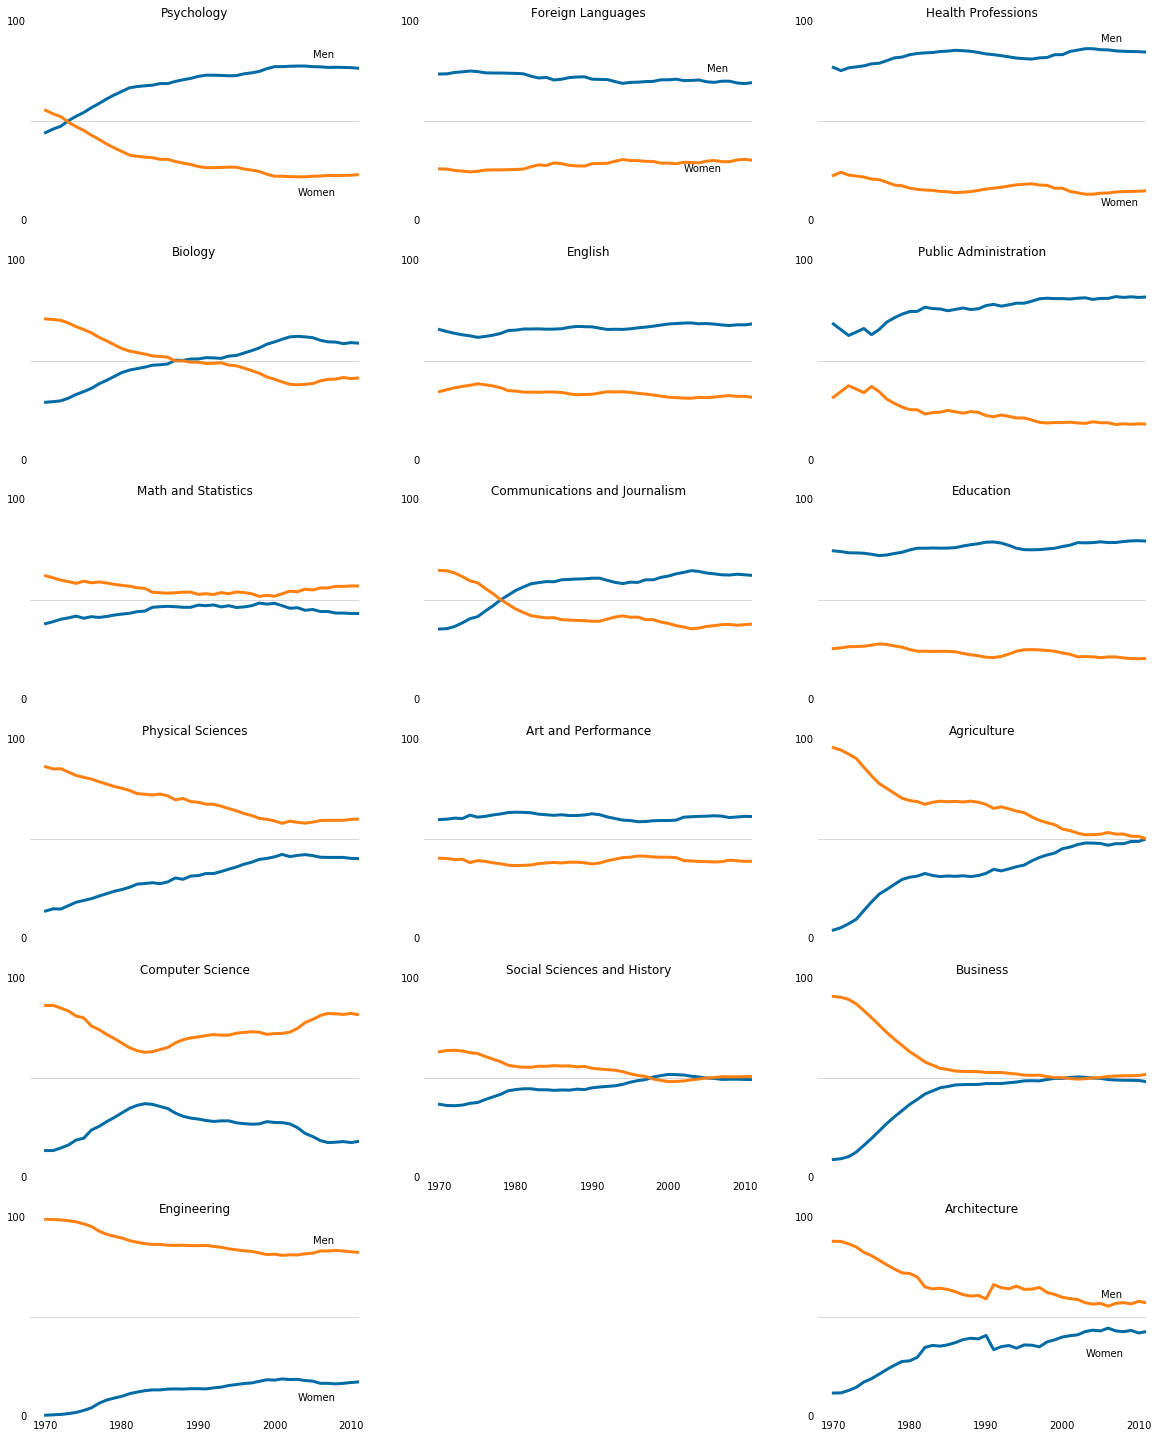

In [65]:
#Calling and executing our data visualisation
fig = plt.figure(figsize=(20, 25))
firstcolumn_stem_plot()
secondcolumn_lib_arts_plot()
thirdcolumn_others_plot()

In [69]:
# To show the backend being used:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

### Exporting to a single image file ###

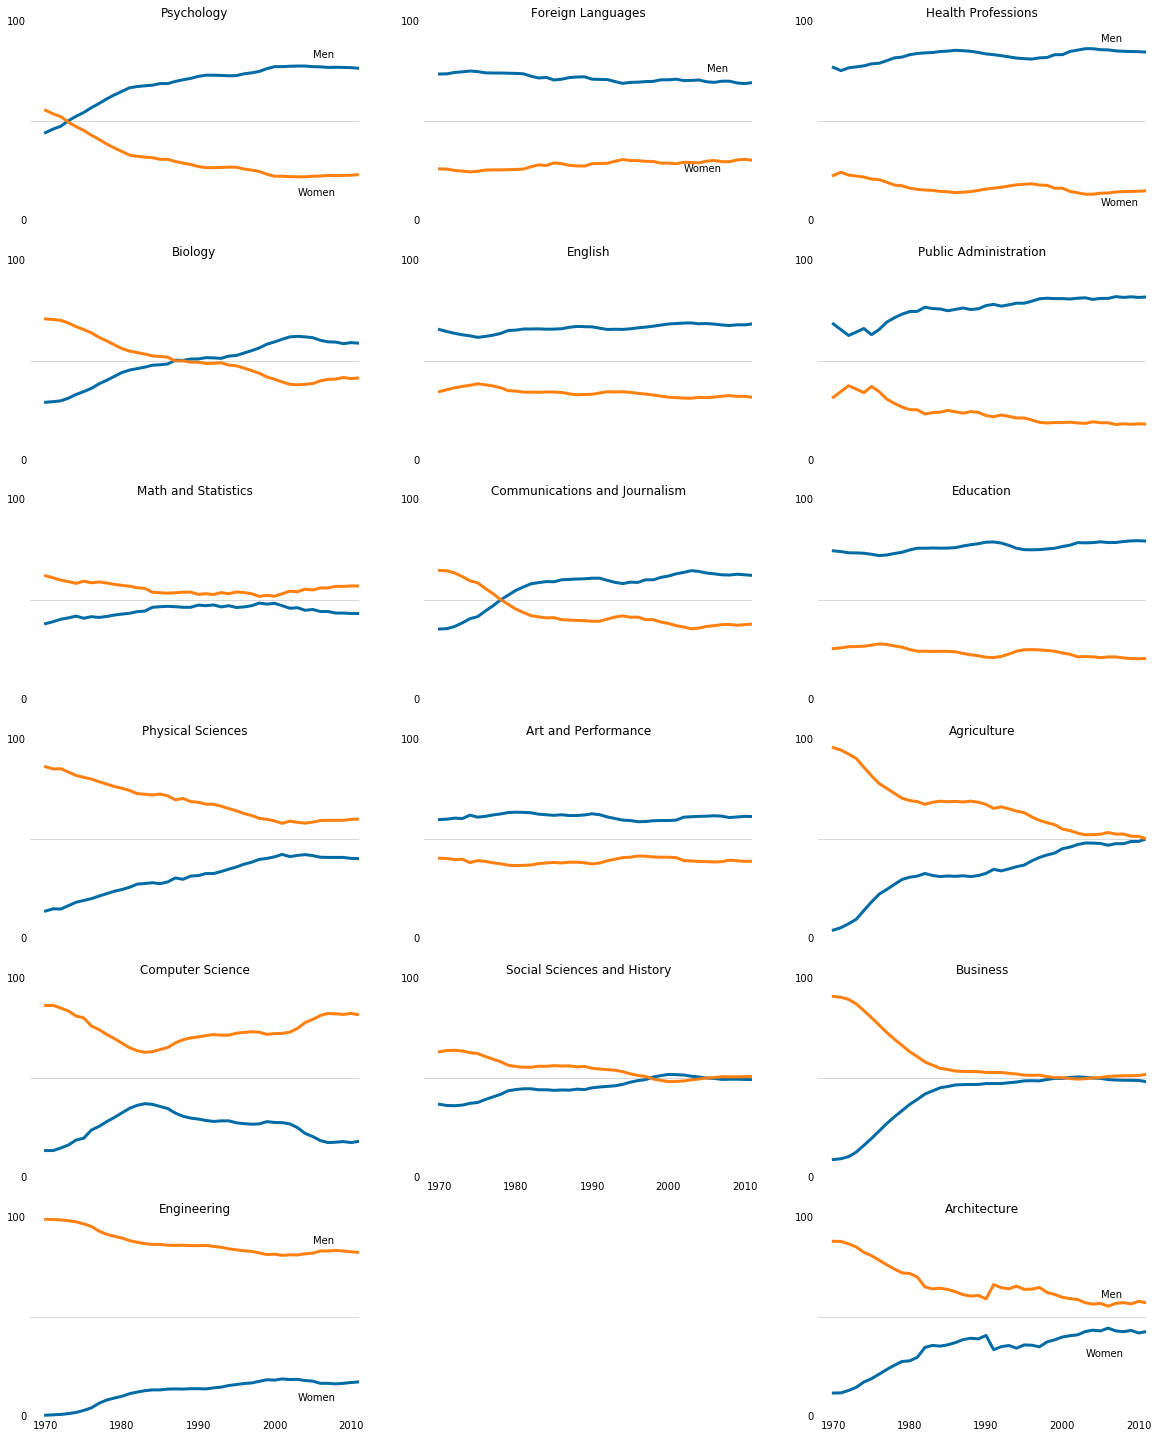

In [70]:
#Calling and executing our data visualisation
fig = plt.figure(figsize=(20, 25))
firstcolumn_stem_plot()
secondcolumn_lib_arts_plot()
thirdcolumn_others_plot()
fig.savefig("gender_degrees.png")
plt.show()